<a href="https://colab.research.google.com/github/seankwon1014/Pytorch/blob/master/Pytorch_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [0]:
X, y = datasets.make_blobs(n_samples=100, random_state=123, centers=[[-0.5,0.5],[0.5,-0.5]], cluster_std=0.4)

In [0]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100,1))

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0],X[y==0, 1])
  plt.scatter(X[y==1, 0],X[y==1, 1])

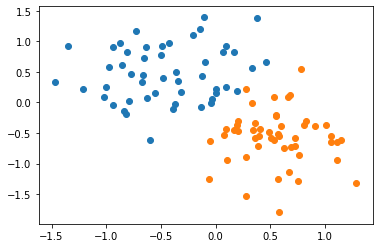

In [0]:
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [0]:
torch.manual_seed(2)
model = Model(2,1)
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
 tensor([0.1939], requires_grad=True)]

In [0]:
[w,b] = model.parameters()
w1, w2 = w.view(2)  # view(2) makes 2 channel from w
def get_params():
  return(w1.item(), w2.item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2,2])
  x2 = (w1*x1 + b1)/(-w2) # From 0 = w1*x1 + w2*x2 + b1
  plt.plot(x1, x2, 'r')
  scatter_plot()

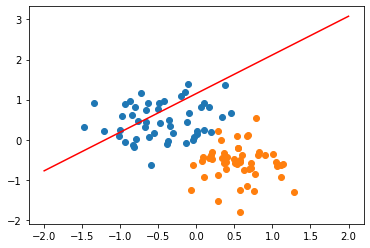

In [0]:
plot_fit("Initial Model")

In [0]:
criterion = nn.BCELoss() # Binary Cross Entropy
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [0]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [0]:
list(model.parameters())

[Parameter containing:
 tensor([[ 1.4356, -1.4284]], requires_grad=True), Parameter containing:
 tensor([-0.0688], requires_grad=True)]

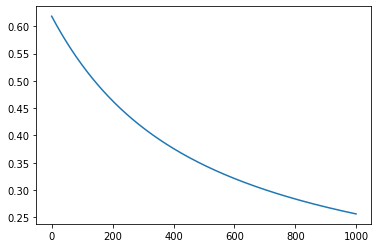

In [0]:
plt.plot(range(epochs), losses)

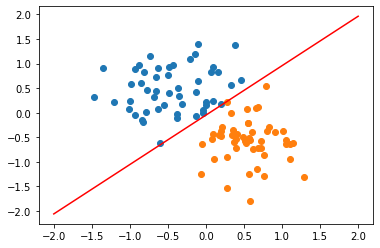

In [0]:
plot_fit("Trained Model")

Red point positive probability = 0.9424158334732056
Black point positive probability = 0.05055497586727142
Red point belongs in class 1
Red point belongs in class 0


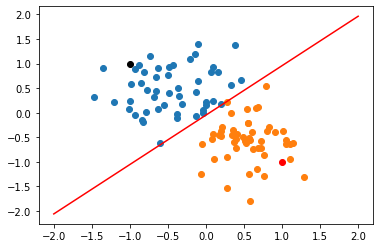

In [0]:
# Test with sample data
point1 = torch.Tensor([1, -1])
point2 = torch.Tensor([-1, 1])

plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
plot_fit("Trained_Model")

print("Red point positive probability = {}".format(model.forward(point1).item()))
print("Black point positive probability = {}".format(model.forward(point2).item()))

print("Red point belongs in class {}".format(model.predict(point1)))
print("Red point belongs in class {}".format(model.predict(point2)))